In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

MAX_HOUR = 96

path = '../data/'

Timeliness of the first correction

In [2]:
props = []
data = pd.read_csv(path + "notes_all.csv")
tweet_ids = data["tweet_id"].unique()

for hour in range(1, MAX_HOUR+1):
    tweet_ids_2 = []
    
    for tweet_id in data["tweet_id"].unique():
        note_times = sorted(data[data["tweet_id"] == tweet_id]["delta_seconds"])
    
        if note_times[0] / 3600 <= hour:
            tweet_ids_2.append(tweet_id)
    props.append(len(tweet_ids_2) / len(tweet_ids))

In [3]:
print(props)

[0.12311526479750778, 0.20934579439252338, 0.2735202492211838, 0.32897196261682243, 0.3710903426791277, 0.4087227414330218, 0.44012461059190033, 0.4660436137071651, 0.48996884735202495, 0.5110280373831776, 0.5312149532710281, 0.5517757009345794, 0.5720872274143303, 0.590778816199377, 0.6104672897196262, 0.6275389408099689, 0.6446105919003116, 0.6626791277258567, 0.68, 0.7014330218068536, 0.7208722741433021, 0.7363239875389408, 0.7542679127725856, 0.7709657320872274, 0.7829283489096573, 0.7941433021806854, 0.8033644859813084, 0.8122118380062305, 0.8201869158878504, 0.8275389408099688, 0.8330218068535825, 0.8371339563862928, 0.8414953271028037, 0.845607476635514, 0.849595015576324, 0.8527102803738318, 0.8558255451713396, 0.8596884735202492, 0.863177570093458, 0.8672897196261682, 0.8710280373831776, 0.8748909657320872, 0.8776323987538941, 0.8806230529595016, 0.883613707165109, 0.8874766355140187, 0.8893457943925234, 0.8922118380062305, 0.8948286604361371, 0.8973208722741433, 0.89894080996

Timeliness of the first high-quality notes

In [4]:
props_2 = []

for hour in range(1, MAX_HOUR+1):
    data = pd.read_csv(path + "notes_all.csv")
    data = data[data["note_score"] >= 0.35]
    tweet_ids = data["tweet_id"].unique()

    tweet_ids_2 = []
    for tweet_id in data["tweet_id"].unique():
        note_times = sorted(data[data["tweet_id"] == tweet_id]["delta_seconds"])
    
        if note_times[0] / 3600 <= hour:
            tweet_ids_2.append(tweet_id)
    props_2.append(len(tweet_ids_2) / len(tweet_ids))

In [5]:
print(props_2)

[0.0844240837696335, 0.16034031413612565, 0.20680628272251309, 0.2519633507853403, 0.281413612565445, 0.32591623036649214, 0.35929319371727747, 0.3841623036649215, 0.406413612565445, 0.4319371727748691, 0.45157068062827227, 0.4712041884816754, 0.49345549738219896, 0.5098167539267016, 0.5346858638743456, 0.555628272251309, 0.5765706806282722, 0.5890052356020943, 0.612565445026178, 0.6341623036649214, 0.6629581151832461, 0.6819371727748691, 0.7041884816753927, 0.7212041884816754, 0.7362565445026178, 0.7447643979057592, 0.7558900523560209, 0.768979057591623, 0.7820680628272252, 0.7925392670157068, 0.7984293193717278, 0.805628272251309, 0.8134816753926701, 0.8206806282722513, 0.824607329842932, 0.8259162303664922, 0.8304973821989529, 0.8363874345549738, 0.8416230366492147, 0.8488219895287958, 0.8547120418848168, 0.8586387434554974, 0.8612565445026178, 0.8651832460732984, 0.8678010471204188, 0.8730366492146597, 0.8782722513089005, 0.881544502617801, 0.8835078534031413, 0.8841623036649214, 0

Plot

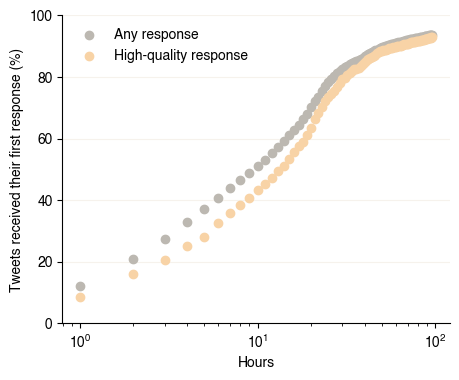

In [6]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(range(1, MAX_HOUR+1), props, color='#bcb8b1', label='Any response')
plt.scatter(range(1, MAX_HOUR+1), props_2, color='#F8D3A6', label='High-quality response')
plt.xlabel('Hours')
plt.ylabel('Tweets received their first response (%)')
plt.yticks([0,0.2,0.4,0.6,0.8,1], labels=[0,20,40,60,80,100])
plt.xscale('log')
ax.set_axisbelow(True)
ax.grid(axis='y', color='#F6F2EC')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(facecolor='w', edgecolor='w')